In [1]:
import pandas as pd

In [2]:
syn_hh = pd.read_csv("../output/syn_hh_final.csv")
syn_pp = pd.read_csv("../output/syn_pp_final.csv")

In [10]:
dict_hhid_POA = dict(zip(syn_hh["hhid"], syn_hh["POA"]))
syn_pp["POA"] = syn_pp.apply(lambda r: dict_hhid_POA[int(r["hhid"])],axis=1)
syn_pp

,age,sex,persinc,nolicence,anywork,hhid,relationship,POA
0,20-29,F,$1-199 p.w.,Some Licence,N,1381674,Child,3175
1,20-29,F,$1-199 p.w.,Some Licence,N,1442896,Child,3183
2,20-29,F,$1-199 p.w.,Some Licence,N,2246392,Child,3678
3,0-9,M,Zero Income,No Licence,N,39840,Child,3003
4,0-9,F,Zero Income,No Licence,N,55770,Child,3006
...,...,...,...,...,...,...,...,...
7035185,30-39,M,$400-599 p.w.,Some Licence,N,2801757,Main,3996
7035186,70-79,M,$800-999 p.w.,Some Licence,N,2801758,Main,3996
7035187,70-79,F,$1000-1249 p.w.,Some Licence,N,2801759,Main,3996
7035188,40-49,F,$400-599 p.w.,Some Licence,N,2801760,Main,3996


In [19]:
import pickle
with open('../data/dict_pp_states.pickle', 'rb') as handle:
    state_names_pp = pickle.load(handle)

In [20]:
state_names_pp

{'age': ['50-59',
  '40-49',
  '10-19',
  '0-9',
  '20-29',
  '60-69',
  '70-79',
  '80-89',
  '30-39',
  '90-99',
  '100+'],
 'sex': ['M', 'F'],
 'persinc': ['$1000-1249 p.w.',
  '$1-199 p.w.',
  'Zero Income',
  '$300-399 p.w.',
  '$800-999 p.w.',
  '$400-599 p.w.',
  '$1250-1499 p.w.',
  '$1500-1999 p.w.',
  '$600-799 p.w.',
  '$2000+ p.w.',
  '$200-299 p.w.',
  'Negative Income',
  'Missing/Refused'],
 'nolicence': ['Some Licence', 'No Licence'],
 'anywork': ['Y', 'N']}

In [40]:
atts_labels = {"age": [
    '0-9', 
    '10-19', 
    '20-29', 
    '30-39', 
    '40-49', 
    '50-59', 
    '60-69',
    '70-79',
    '70-79',
    '80-89',
    '90-99',
    "100+"
],
"persinc": [
    "Missing/Refused",
    "Negative Income",
    "Zero Income",
    '$1-199 p.w.',
    '$200-299 p.w.',
    '$300-399 p.w.',
    '$400-599 p.w.',
    '$600-799 p.w.',
    '$800-999 p.w.',
    '$1000-1249 p.w.',
    '$1250-1499 p.w.',
    '$1500-1999 p.w.',
    '$2000+ p.w.'
]
}

In [23]:
import matplotlib.pyplot as plt

In [44]:
def plot_bar_syn_rela(rela, att):
    df = syn_pp[syn_pp["relationship"] == rela]
    counts = df[att].value_counts()
    data_age_grand = []
    for state in atts_labels[att]:
        if state in counts.index:
            data_age_grand.append(counts.at[state]) 
        else:
            data_age_grand.append(0) 
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    plt.bar(atts_labels[att], data_age_grand, color ='maroon', 
            width = 0.4)
    plt.xlabel(f"{att} groups")
    plt.ylabel("Number of people")
    plt.title(f"Total number people for each {att} groups for {rela}")
    plt.xticks(rotation=45)
    plt.show()

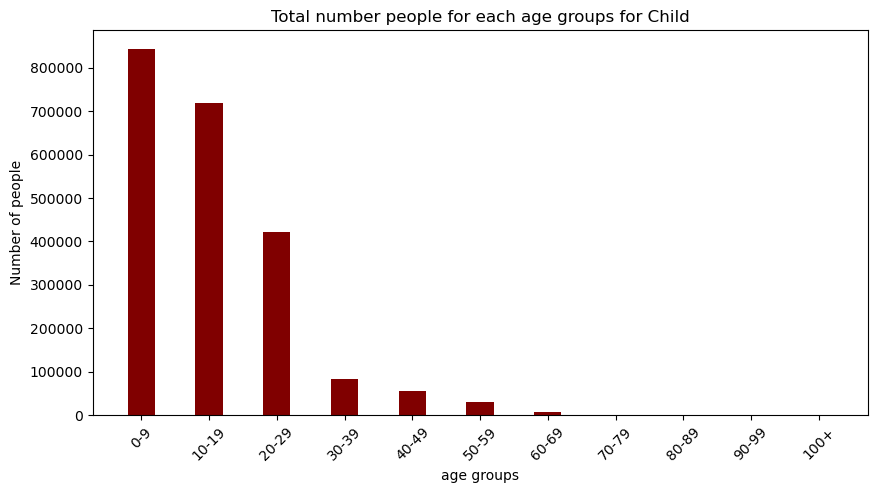

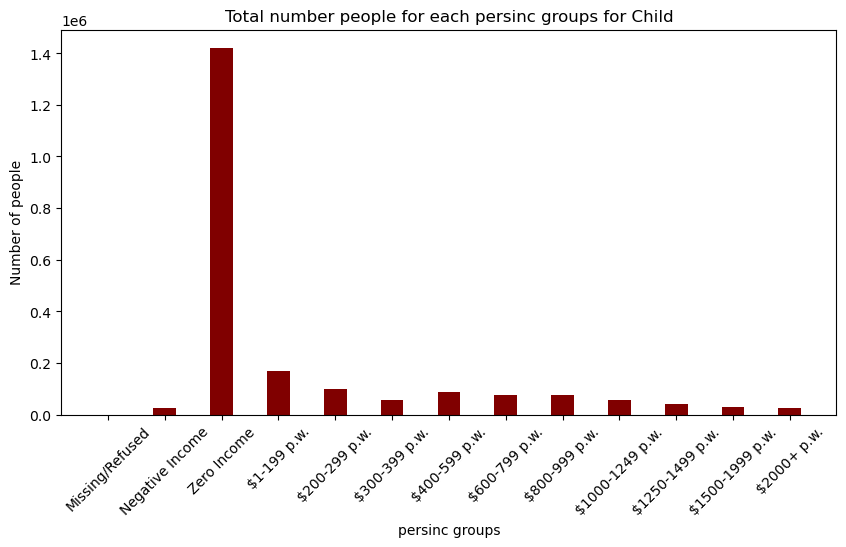

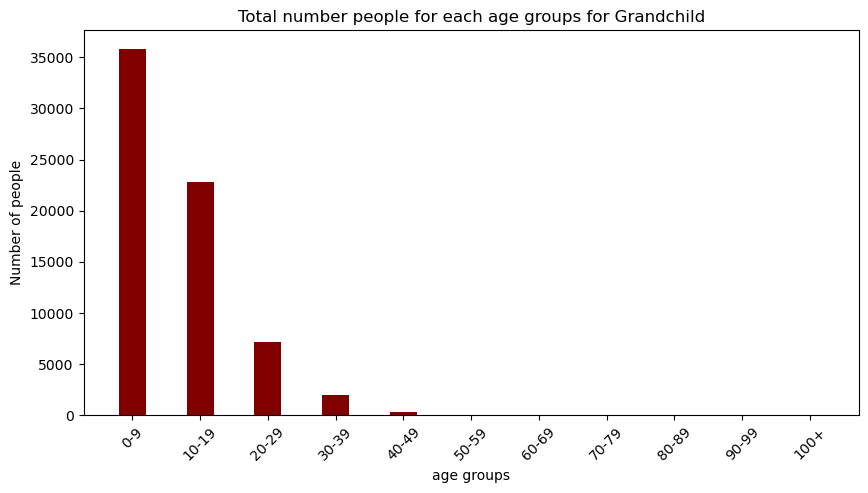

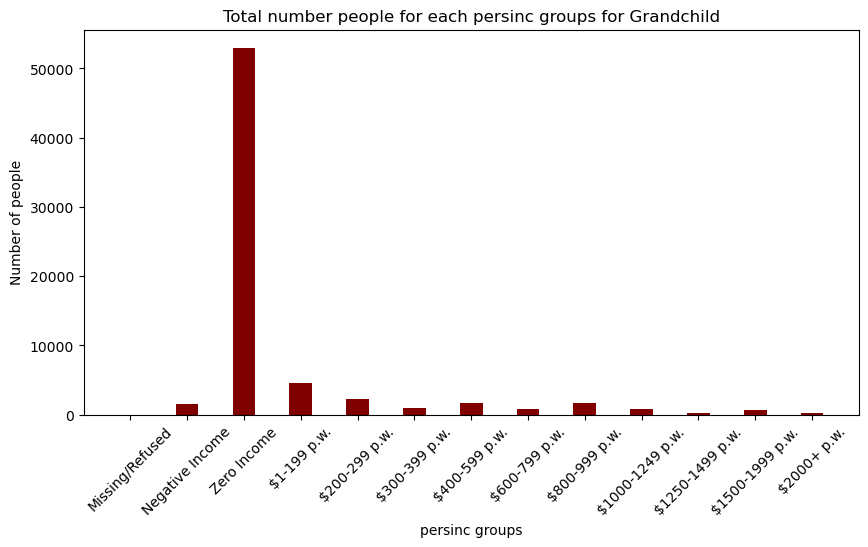

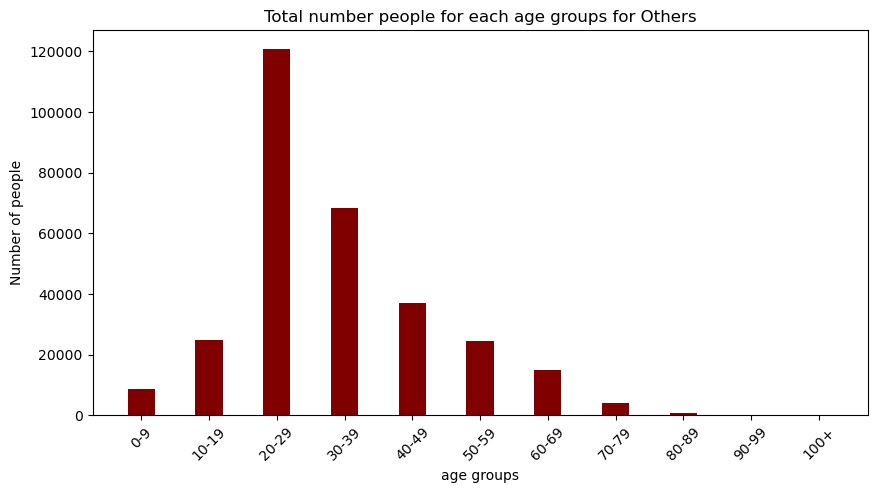

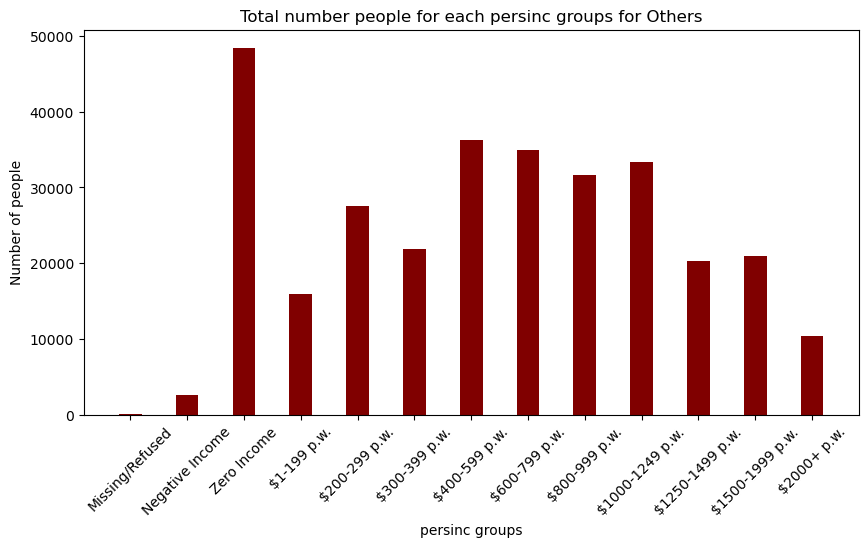

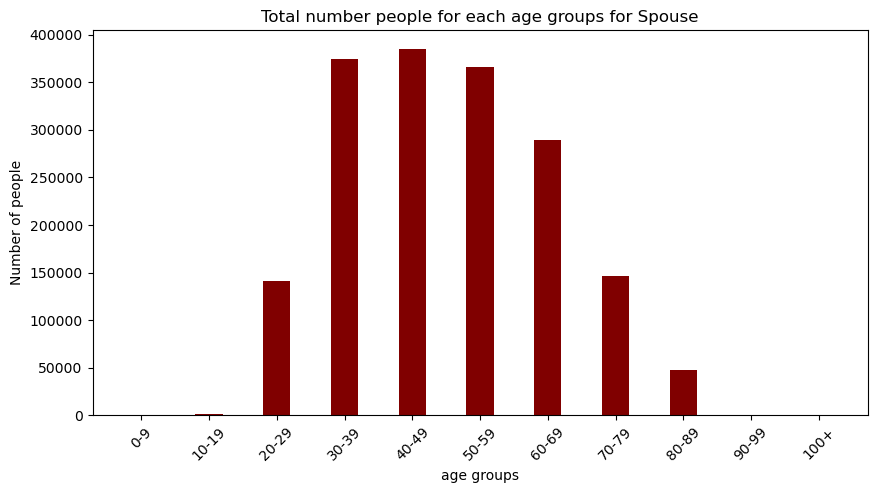

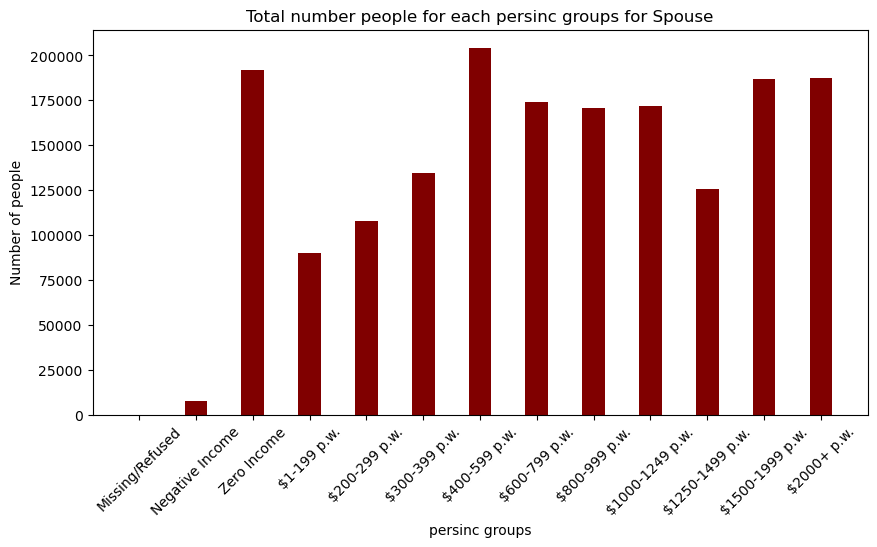

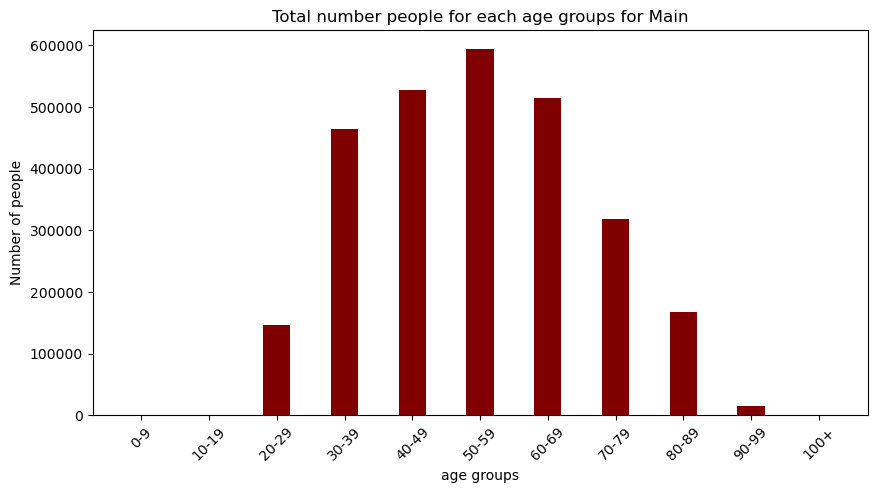

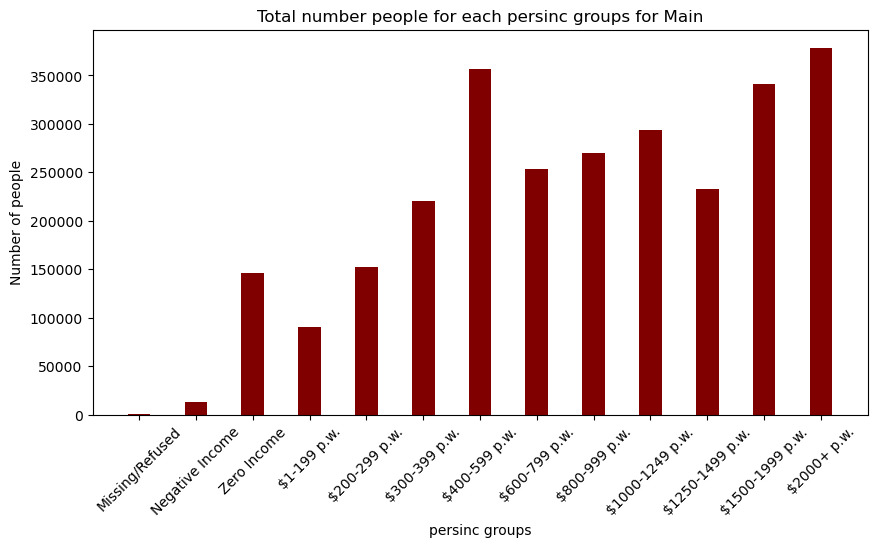

In [45]:
ls_rela = syn_pp["relationship"].unique()
for rela in ls_rela:
    plot_bar_syn_rela(att="age", rela=rela)
    plot_bar_syn_rela(att="persinc", rela=rela)